Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


ROC AUC: 1.00


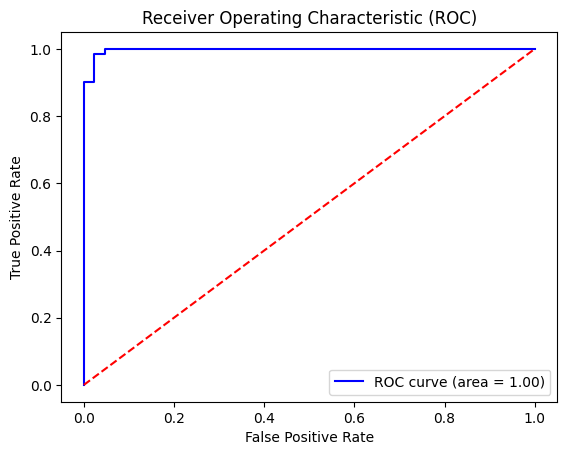


Confusion Matrix with threshold 0.4:
 [[41  2]
 [ 0 71]]

Classification Report with custom threshold:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



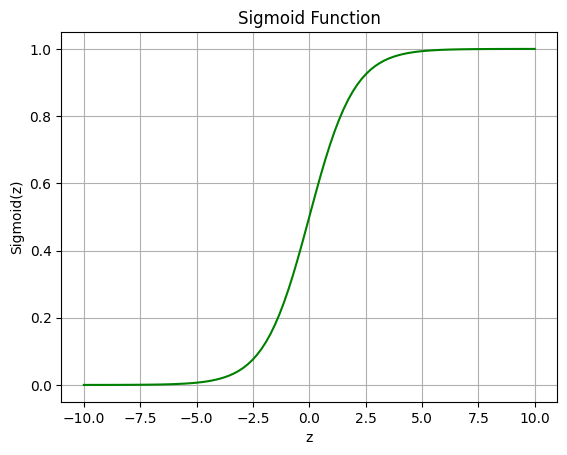

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Step 1: Load binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train/test split and standardize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Fit a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Evaluate with confusion matrix, precision, recall, ROC-AUC
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"\nROC AUC: {roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

# Step 5: Tune threshold and explain sigmoid function
# Example: Set custom threshold
custom_threshold = 0.4
y_pred_custom = (y_proba >= custom_threshold).astype(int)

print(f"\nConfusion Matrix with threshold {custom_threshold}:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report with custom threshold:\n", classification_report(y_test, y_pred_custom))

# Sigmoid Function explanation (visual)
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure()
plt.plot(z, sigmoid, color='green')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()